In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import corner

In [2]:
had_hyperparams = pd.read_csv(
    '../make-agnostic-processes/hadagn/hyperparams-mc_hadronic-agnostic.csv'
)

hyp_hyperparams = pd.read_csv(
    '../make-agnostic-processes/hypagn/hyperparams-mc_hyperonic-agnostic.csv'
)

qrk_hyperparams = pd.read_csv(
    '../make-agnostic-processes/qrkagn/hyperparams-mc_quark-agnostic.csv'
)

In [3]:
had_hyperparams

,poly_degree,sigma,l,sigma_obs,multiplier,logLike
0,3.0,2.439181,0.426003,11.133068,5.933769,-0.0
1,3.0,2.047714,0.795179,14.901157,2.175362,-0.0
2,3.0,1.046013,0.861461,4.700699,0.507305,-0.0
3,3.0,1.040176,0.159597,1.023497,5.735284,-0.0
4,3.0,3.799310,0.575679,10.933733,1.848534,-0.0
...,...,...,...,...,...,...
355,3.0,2.249425,0.194943,8.532194,1.924250,-0.0
356,3.0,3.013536,0.820377,9.011890,3.788702,-0.0
357,3.0,1.358088,0.335523,5.055107,1.104414,-0.0
358,3.0,1.655556,0.419026,16.370355,0.837044,-0.0


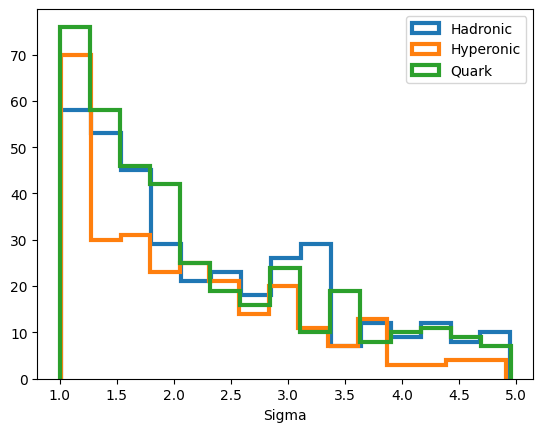

In [4]:
fig, ax = plt.subplots()

ax.hist(had_hyperparams['sigma'], bins=15, histtype='step', linewidth=3, label='Hadronic')
ax.hist(hyp_hyperparams['sigma'], bins=15, histtype='step', linewidth=3, label='Hyperonic')
ax.hist(qrk_hyperparams['sigma'], bins=15, histtype='step', linewidth=3, label='Quark')

ax.set_xlabel('Sigma') 

ax.legend();

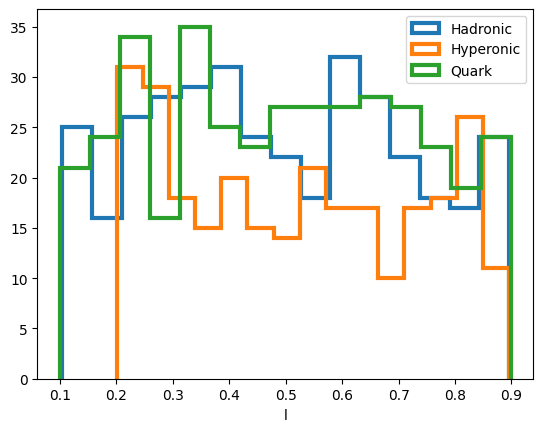

In [5]:
fig, ax = plt.subplots()

ax.hist(had_hyperparams['l'], bins=15, histtype='step', linewidth=3, label='Hadronic')
ax.hist(hyp_hyperparams['l'], bins=15, histtype='step', linewidth=3, label='Hyperonic')
ax.hist(qrk_hyperparams['l'], bins=15, histtype='step', linewidth=3, label='Quark')

ax.set_xlabel('l')

ax.legend();

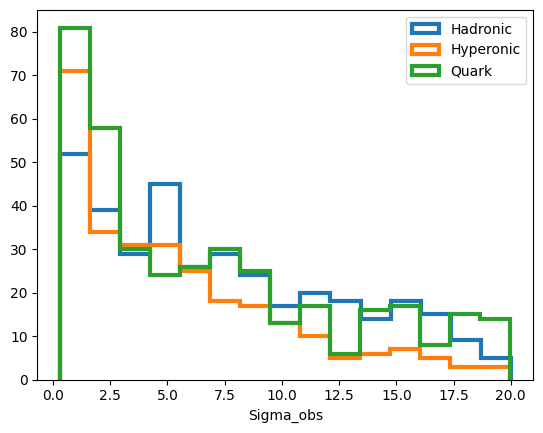

In [6]:
fig, ax = plt.subplots()

ax.hist(had_hyperparams['sigma_obs'], bins=15, histtype='step', linewidth=3, label='Hadronic')
ax.hist(hyp_hyperparams['sigma_obs'], bins=15, histtype='step', linewidth=3, label='Hyperonic')
ax.hist(qrk_hyperparams['sigma_obs'], bins=15, histtype='step', linewidth=3, label='Quark')

ax.set_xlabel('Sigma_obs')

ax.legend();

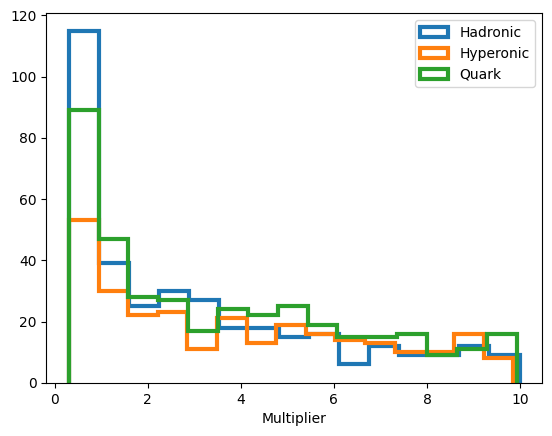

In [7]:
fig, ax = plt.subplots()

ax.hist(had_hyperparams['multiplier'], bins=15, histtype='step', linewidth=3, label='Hadronic')
ax.hist(hyp_hyperparams['multiplier'], bins=15, histtype='step', linewidth=3, label='Hyperonic')
ax.hist(qrk_hyperparams['multiplier'], bins=15, histtype='step', linewidth=3, label='Quark')

ax.set_xlabel('Multiplier')

ax.legend();

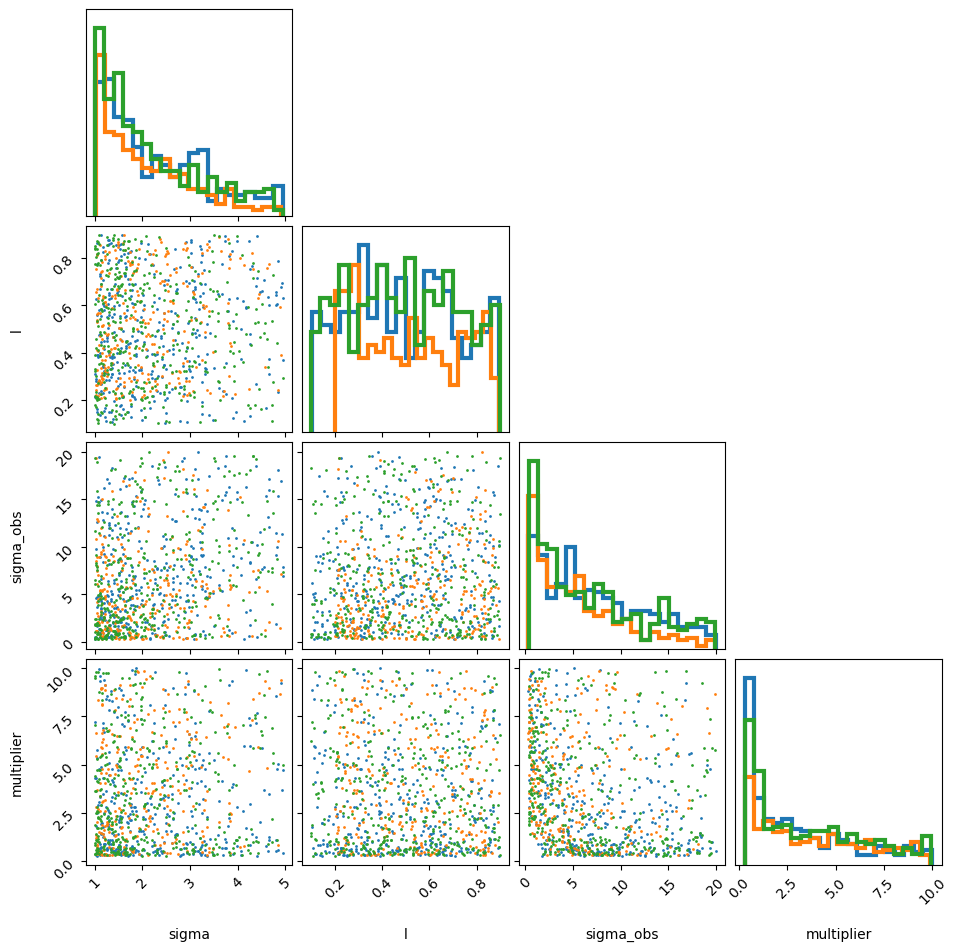

In [9]:
fig, ax = plt.subplots(4, 4, figsize=(10, 10))

corner.corner(
    had_hyperparams[['sigma', 'l', 'sigma_obs', 'multiplier']], 
    fig=fig, 
    labels=['sigma', 'l', 'sigma_obs', 'multiplier'], 
    color='C0',
    plot_density=False,
    plot_contours=False,
    no_fill_contours=True,
    hist_kwargs=dict(histtype='step', linewidth=3),
    data_kwargs=dict(alpha=1)
)

corner.corner(
    hyp_hyperparams[['sigma', 'l', 'sigma_obs', 'multiplier']], 
    fig=fig, 
    labels=['sigma', 'l', 'sigma_obs', 'multiplier'], 
    color='C1',
    plot_density=False,
    plot_contours=False,
    no_fill_contours=True,
    hist_kwargs=dict(histtype='step', linewidth=3),
    data_kwargs=dict(alpha=1)
)

corner.corner(
    qrk_hyperparams[['sigma', 'l', 'sigma_obs', 'multiplier']], 
    fig=fig, 
    labels=['sigma', 'l', 'sigma_obs', 'multiplier'], 
    color='C2',
    plot_density=False,
    plot_contours=False,
    no_fill_contours=True,
    hist_kwargs=dict(histtype='step', linewidth=3),
    data_kwargs=dict(alpha=1)
);

In [12]:
combined_hyperparams = pd.concat([had_hyperparams, hyp_hyperparams, qrk_hyperparams], ignore_index=True)

In [15]:
shuffled_combined_hyperparams = combined_hyperparams.sample(frac=1, random_state=42)

In [17]:
shuffled_combined_hyperparams

,poly_degree,sigma,l,sigma_obs,multiplier,logLike
522,4.0,2.279512,0.744830,0.655552,5.228861,0.0
453,4.0,2.556344,0.269342,3.595922,7.794101,0.0
439,4.0,1.287304,0.826454,8.569388,0.313182,-0.0
31,3.0,1.784411,0.216181,17.278641,0.478574,-0.0
615,4.0,1.158261,0.287195,1.232916,8.111187,0.0
...,...,...,...,...,...,...
106,3.0,1.301586,0.559148,12.005623,0.309583,-0.0
270,3.0,3.333277,0.331545,4.685840,0.921636,-0.0
860,5.0,2.208301,0.473223,1.759015,9.500744,-0.0
435,4.0,1.069614,0.203349,2.101389,2.727162,0.0


In [19]:
shuffled_combined_hyperparams.to_csv('../make-agnostic-processes-tests/cusagn/hyperparams-mc_custom-agnostic.csv', index=False)